## The Normal Equation

To find the value of $\theta$ that minimizes the cost function we use *Normal Equation*.

$\hat{\theta} = (X^TX)^{-1}X^Ty$

In this equation:

- $\hat{\theta}$ is the values of $\theta$ that minimizes the cost function.
- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

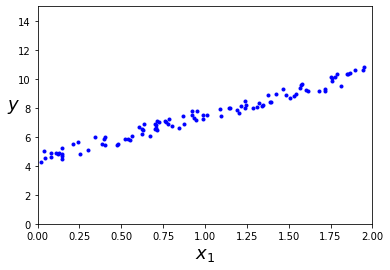

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let's compute the **Normal Equation**. We will use `inv()` function from NumPy's to compute the inverse of a matrix, and `dot()` method for matrix multiplication.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y =  4 + 3x_1 + noise$

In [4]:
theta_best

array([[4.45077438],
       [3.05421059]])

Now we can make predictions using $\hat\theta$:

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.45077438],
       [10.55919556]])

Let's plot hist model's predictions

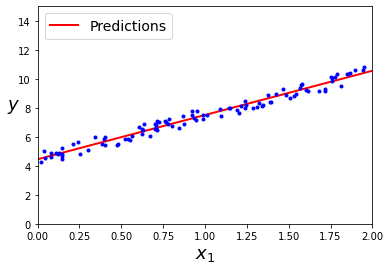

In [6]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.45077438]), array([[3.05421059]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.45077438],
       [10.55919556]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.45077438],
       [3.05421059]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.45077438],
       [3.05421059]])